<a href="https://colab.research.google.com/github/Sumofzero/Notebooks/blob/main/%D0%A4%D0%BE%D0%BD%D0%B4%D0%BE%D0%B2%D1%8B%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
from sklearn.model_selection import train_test_split

%matplotlib inline

from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import tqdm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

In [2]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [4]:
import yfinance as yf

In [3]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 7.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=c91a989de44099b37b5bbd96dfaeac1efe097c55ee7cf5d3f764c30b72fc909b
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [5]:
dat = yf.Tickers('NVDA NDAQ AAPL MSFT ADBE GOOGL AMZN CSCO EBAY INTC NFLX QCOM XLNX BIDU ATVI EA JPM JNJ XOM BAC WFC T PFE BA ORCL DIS IBM MCD ABT BKNG GS NKE SBUX MS BLK GD FDX SPGI SPG')

In [6]:
dat_target = yf.Ticker('NVDA')
target = dat_target.history(start="2015-01-01", end="2021-01-08")
target

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,19.374790,19.519164,19.066796,19.374790,2842000,0.0,0
2015-01-05,19.374791,19.432541,18.960925,19.047548,4948800,0.0,0
2015-01-06,19.076420,19.095670,18.450806,18.470057,4944100,0.0,0
2015-01-07,18.604805,18.768427,18.364184,18.421932,8045200,0.0,0
2015-01-08,18.633674,19.230413,18.624049,19.114916,7094500,0.0,0
...,...,...,...,...,...,...,...
2020-12-31,525.460022,526.039978,516.599976,522.200012,4806500,0.0,0
2021-01-04,524.169983,546.099976,518.500000,524.539978,14016000,0.0,0
2021-01-05,523.989990,537.739990,523.479980,536.190002,8069000,0.0,0


In [7]:
target.fillna(0, inplace=True)
y = pd.DataFrame(target.Open).reset_index().drop(columns=['Date'])
y.head()

,Open
0,19.374790
1,19.374791
2,19.076420
3,18.604805
4,18.633674


In [8]:
data = dat.download(start="2015-01-01", end="2021-01-08")

[*********************100%***********************]  39 of 39 completed


In [9]:
data2 = data.reset_index().drop(columns=['Date'])

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [10]:
columns = data2.columns
columns = columns.drop('Dividends')
columns = columns.drop('Stock Splits')
columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close',  'ABT'),
            ( 'Close', 'ADBE'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'ATVI'),
            ( 'Close',   'BA'),
            ( 'Close',  'BAC'),
            ( 'Close', 'BIDU'),
            ( 'Close', 'BKNG'),
            ( 'Close',  'BLK'),
            ...
            ('Volume', 'ORCL'),
            ('Volume',  'PFE'),
            ('Volume', 'QCOM'),
            ('Volume', 'SBUX'),
            ('Volume',  'SPG'),
            ('Volume', 'SPGI'),
            ('Volume',    'T'),
            ('Volume',  'WFC'),
            ('Volume', 'XLNX'),
            ('Volume',  'XOM')],
           length=195)

In [11]:
data2.Volume = data2.Volume/10000
data2[columns] = data2[columns]
data2.head()

Close                        ...   Volume                 
        AAPL        ABT       ADBE  ...      WFC    XLNX      XOM
0  24.898552  39.701111  72.339996  ...  1170.09  240.24  1022.04
1  24.197117  39.709957  71.980003  ...  1500.05  261.11  1850.24
2  24.199400  39.259010  70.529999  ...  2021.12  343.05  1667.07
3  24.538729  39.577320  71.110001  ...  1571.47  211.06  1359.07
4  25.481558  40.390804  72.919998  ...  1672.16  282.42  1548.75

[5 rows x 273 columns]

In [12]:
data2.fillna(0, inplace=True)

In [13]:
X = data2

In [14]:
y.shape, X.shape, type(y)

((1515, 1), (1515, 273), pandas.core.frame.DataFrame)

In [15]:
X_t = X.loc[:int(0.9*X.shape[0])+1]
X_t.shape

(1365, 273)

In [16]:
y_t = y.loc[int(0.05*y.shape[0]):int(0.95*y.shape[0])]
y_t.shape

(1365, 1)

In [17]:
y_t.shape, X_t.shape

((1365, 1), (1365, 273))

In [18]:
from sklearn.model_selection import train_test_split
import tqdm
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

In [20]:
y_train.shape, X_train.shape

((1092, 1), (1092, 273))

In [ ]:
r2_score_train = []
r2_score_test = []
mse_score_test = []
mse_score_train = []
for tree in tqdm.tnrange(1000,10000, 1000):
  reg = XGBRegressor(n_estimators=tree, max_depth=10, learning_rate=0.001, seed=2020)
  reg.fit(X_train, y_train)

  pred_train = reg.predict(X_train)
  pred_test = reg.predict(X_test)

  r2_score_train.append(r2_score(pred_train, y_train))
  r2_score_test.append(r2_score(pred_test, y_test))

  mse_score_train.append(mean_squared_error(pred_train, y_train))
  mse_score_test.append(mean_squared_error(pred_test, y_test))

  print('tree :  ', tree, '   ', 'r2 val :  ', r2_score(pred_test, y_test), '    ', 'mse val :  ', mean_squared_error(pred_test, y_test))

[06:24:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
tree :   1000     r2 val :   0.432398815600081      mse val :   1924.8529130468119
[06:25:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
tree :   2000     r2 val :   0.9530749111310982      mse val :   301.2825418204396
[06:28:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
tree :   3000     r2 val :   0.9916135455745224      mse val :   65.37959518922597
[06:32:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

In [ ]:
r2_score_train = []
r2_score_test = []
mse_score_test = []
mse_score_train = []
for depth in tqdm.tnrange(1,51, 5):
  reg = XGBRegressor(n_estimators=100, max_depth=depth, learning_rate=0.001, seed=2020)
  reg.fit(X_train, y_train)

  pred_train = reg.predict(X_train)
  pred_test = reg.predict(X_test)

  r2_score_train.append(r2_score(pred_train, y_train))
  r2_score_test.append(r2_score(pred_test, y_test))

  mse_score_train.append(mean_squared_error(pred_train, y_train))
  mse_score_test.append(mean_squared_error(pred_test, y_test))

  print('max_depth :  ', depth, '   ', 'r2 val :  ', r2_score(pred_test, y_test), '    ', 'mse val :  ', mean_squared_error(pred_test, y_test))

[06:23:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
max_depth :   1     r2 val :   -176.4924992155019      mse val :   11252.557101835233
[06:23:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
max_depth :   6     r2 val :   -144.5474333495853      mse val :   10994.994242998855
[06:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
max_depth :   11     r2 val :   -144.5501470720378      mse val :   10994.958885945125
[06:23:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
max_depth :   16     r2 val :   -144.5501470720378      mse val :   10994.958885945125
[06:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

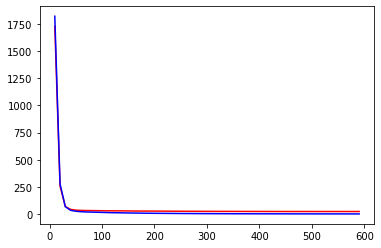

In [ ]:
plt.plot(range(1,1001, 100), r2_score_test, 'r')
plt.plot(range(1,1001, 100), r2_score_train, 'b')

In [ ]:
plt.plot(range(1,1001, 100), mse_score_test, 'r')
plt.plot(range(1,1001, 100), mse_score_train, 'b')

In [ ]:
reg = XGBRegressor(n_estimators=400, max_depth=10, learning_rate=0.1, seed=2020)
reg.fit(X_train, y_train)

pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

[05:26:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mean_squared_error(pred_test, y_test), mean_squared_error(pred_train, y_train)

(58.34436494338766, 4.304787346421619e-07)

In [ ]:
r2_score(pred_test, y_test), r2_score(pred_train, y_train)

(0.9952491591712602, 0.9999999999629389)

In [ ]:
pred_all = reg.predict(X)

In [ ]:
pred_all.shape, y.shape

((1515,), (1515, 1))

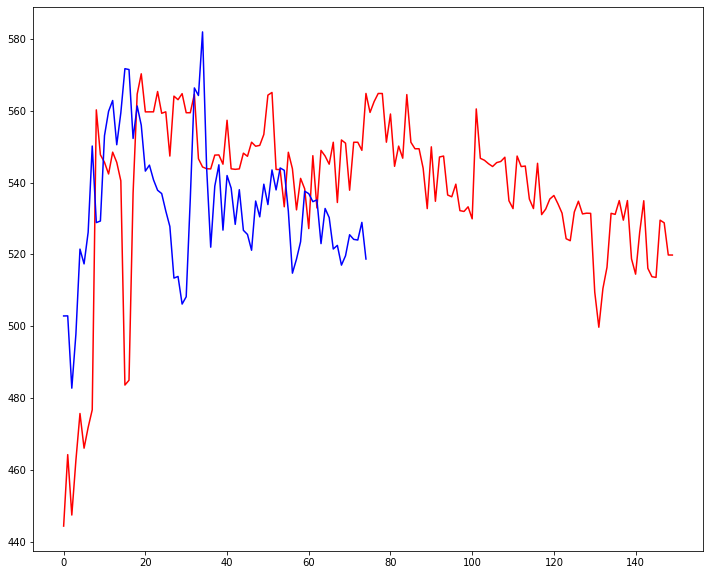

In [ ]:
plt.subplots(figsize=(12,10))
plt.plot(range(150), pred_all[1365:], 'r')
plt.plot(range(75), y[1440:], 'b')

Эта хуйня (бустинг, ансамбли) не умеет эстраполировать

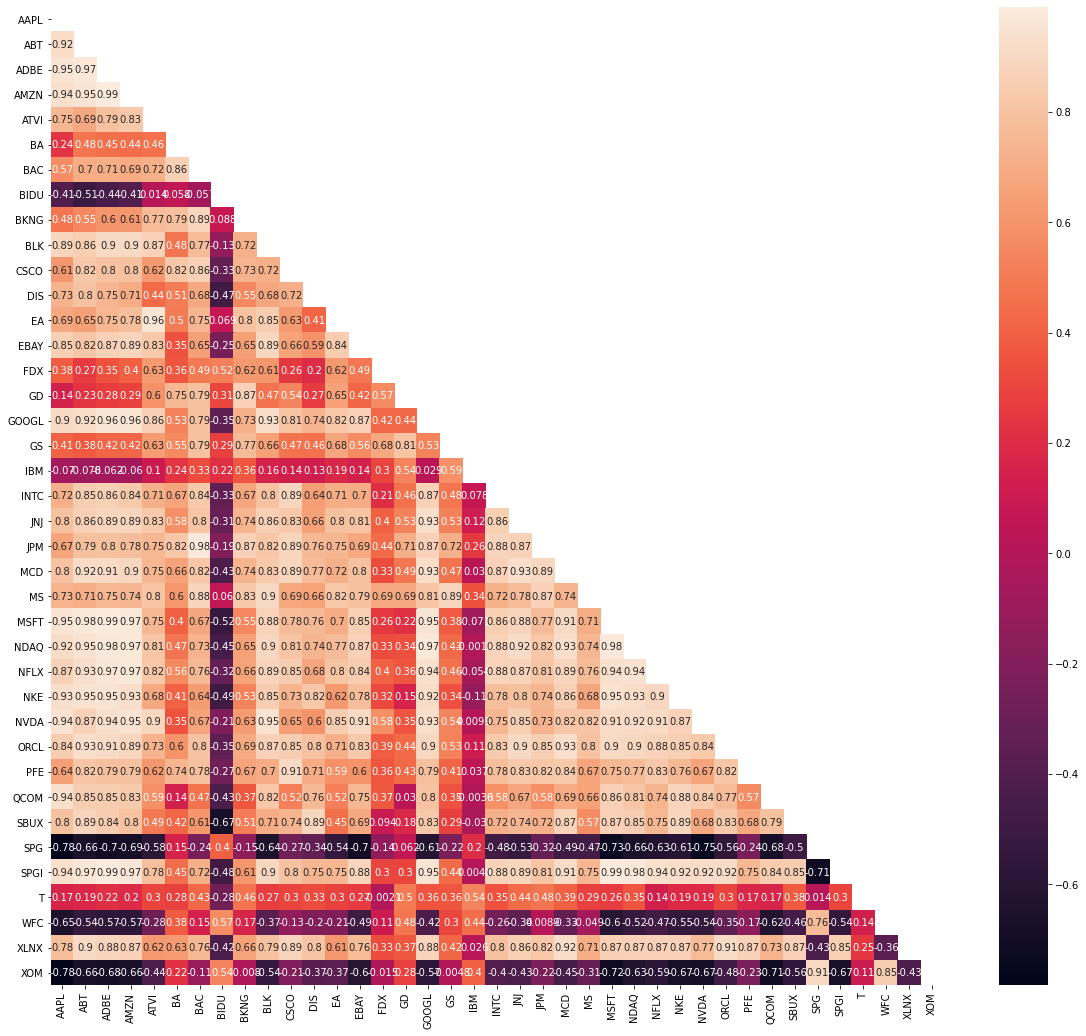

In [21]:
plt.subplots(figsize=(20,18))
corr = data2.Open.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix)

In [84]:
col = list(corr[(corr<0.6) & (corr>(-0.6))].NVDA.dropna().keys())
col.append('NVDA')
col

['BA', 'BIDU', 'FDX', 'GD', 'GS', 'IBM', 'T', 'WFC', 'NVDA']

In [85]:
dat_target = yf.Ticker('NVDA')
target = dat_target.history(start="2015-01-01", end="2021-01-08").fillna(0)
y = pd.DataFrame(target.Open).reset_index().drop(columns=['Date'])
y.head()

,Open
0,19.374790
1,19.374791
2,19.076420
3,18.604805
4,18.633674


In [86]:
names = col[0]
for x in col[1:]:
  names+=' ' + x
names

'BA BIDU FDX GD GS IBM T WFC NVDA'

In [87]:
dat = yf.Tickers(names)

In [88]:
data = dat.download(start="2015-01-01", end="2021-01-08")

[*********************100%***********************]  9 of 9 completed


In [89]:
data2 = data.reset_index().drop(columns=['Date'])
columns = data2.columns
columns = columns.drop('Dividends')
columns = columns.drop('Stock Splits')
data2.Volume = data2.Volume/10000
data2[columns] = data2[columns]
data2.fillna(0, inplace=True)
data2.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Close                          ...  Volume                  
           BA        BIDU         FDX  ...    NVDA        T      WFC
0  112.786011  223.080002  161.657852  ...  284.20  2056.40  1170.09
1  112.004875  219.789993  159.173706  ...  494.88  3042.91  1500.05
2  110.685638  220.179993  159.164291  ...  494.41  2959.58  2021.12
3  112.404106  224.350006  160.336105  ...  804.52  3166.00  1571.47
4  114.391670  229.210007  164.085770  ...  709.45  2279.98  1672.16

[5 rows x 63 columns]

In [90]:
X = data2
y.shape, X.shape, type(y)

((1515, 1), (1515, 63), pandas.core.frame.DataFrame)

In [91]:
X_t = X.loc[:int(0.9*X.shape[0])+1]
X_t.shape

(1365, 63)

In [92]:
y_t = y.loc[int(0.05*y.shape[0]):int(0.95*y.shape[0])]
y_t.shape

(1365, 1)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

In [94]:
y_train.shape, X_train.shape

((1092, 1), (1092, 63))

In [95]:
reg = XGBRegressor(n_estimators=500, max_depth=15, learning_rate=0.1, seed=20)
reg.fit(X_train, y_train)

pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

[16:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [96]:
mean_squared_error(pred_test, y_test), mean_squared_error(pred_train, y_train)

(137.140218160368, 4.0170957706088453e-07)

In [97]:
r2_score(pred_test, y_test), r2_score(pred_train, y_train)

(0.9884221377392027, 0.9999999999654157)

NameError: ignored

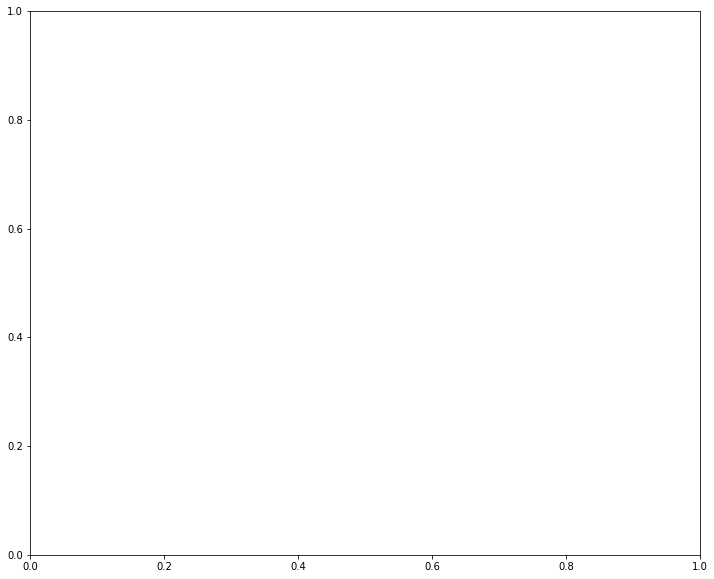

In [36]:
plt.subplots(figsize=(12,10))
plt.plot(range(150), pred_all[1365:], 'r')
plt.plot(range(75), y[1440:], 'b')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=300)

In [ ]:
y_train = y_train.values.reshape((-1, 1, 1))
y_test = y_test.values.reshape((-1, 1, 1))

X_test = np.array(X_test).reshape(-1, 1, 273)
X_train = np.array(X_train).reshape(-1, 1, 273)

In [ ]:
y_train.shape, y_test.shape

((2104, 1, 1), (526, 1, 1))

In [ ]:
X_train.shape, X_test.shape

((2104, 1, 273), (526, 1, 273))

In [ ]:
from numpy import asarray
import tensorflow as tf
import keras
from sklearn.preprocessing import StandardScaler

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=[1, 273]),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)
  ])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_81 (Batc (None, 1, 273)            1092      
_________________________________________________________________
dense_141 (Dense)            (None, 1, 128)            35072     
_________________________________________________________________
dense_142 (Dense)            (None, 1, 128)            16512     
_________________________________________________________________
batch_normalization_82 (Batc (None, 1, 128)            512       
_________________________________________________________________
dense_143 (Dense)            (None, 1, 128)            16512     
_________________________________________________________________
dense_144 (Dense)            (None, 1, 128)            16512     
_________________________________________________________________
batch_normalization_83 (Batc (None, 1, 128)           

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.0005)
loss = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

model.compile(optimizer=opt,
              loss=loss,
              metrics=['mean_squared_error'])

In [ ]:
history = model.fit(x=X_train, y=y_train,
                    validation_data=(X_test, y_test),
                    epochs=5,
                    steps_per_epoch = 1332)

Epoch 1/5
1332/1332 [==============================] - 13s 8ms/step - loss: 7013.7677 - mean_squared_error: 7013.7677 - val_loss: 6094.7490 - val_mean_squared_error: 6094.7490
Epoch 2/5
1332/1332 [==============================] - 9s 7ms/step - loss: 6941.4978 - mean_squared_error: 6941.4978 - val_loss: 4849.8735 - val_mean_squared_error: 4849.8735
Epoch 3/5
1332/1332 [==============================] - 10s 7ms/step - loss: 7678.7709 - mean_squared_error: 7678.7709 - val_loss: 4915.9731 - val_mean_squared_error: 4915.9731
Epoch 4/5
1264/1332 [===========================>..] - ETA: 0s - loss: 7011.0312 - mean_squared_error: 7011.0312WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 6660 batches). You may need to use the repeat() function when building your dataset.


1332/1332 [==============================] - 9s 7ms/step - loss: 7003.8303 - mean_squared_error: 7003.8303 - val_loss: 4149.2759 - val_mean_squared_error: 4149.2759


In [ ]:
y_test.shape, X_test.shape

((526, 1, 1), (526, 1, 273))

In [ ]:
pred = model.predict(np.array(X_t).reshape(-1, 1, 273)).reshape(-1)
pred.shape, y_t.shape

((2630,), (2630, 1))

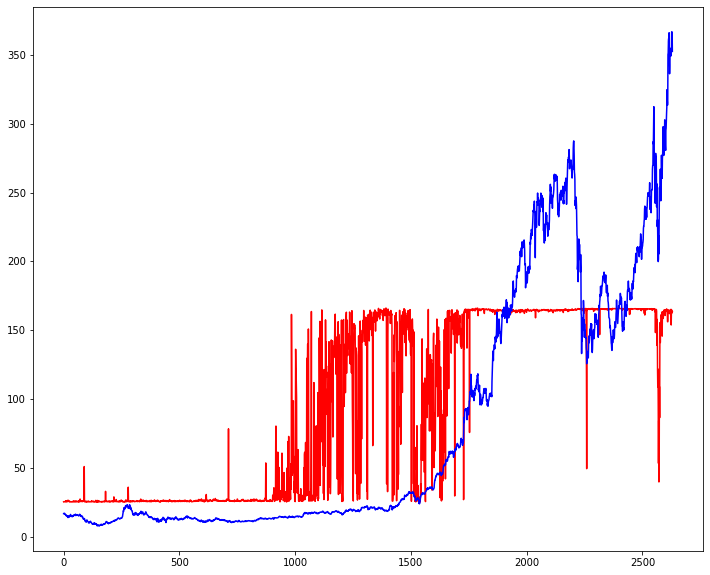

In [ ]:
plt.subplots(figsize=(12,10))
plt.plot(range(2630), pred, 'r')
plt.plot(range(2630), y_t, 'b')

In [ ]:
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import tqdm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from numpy import asarray
import tensorflow as tf
import keras

In [ ]:
data = yf.download('NDAQ AAPL MSFT ADBE GOOGL AMZN CSCO EBAY INTC NFLX QCOM XLNX BIDU ATVI EA NVDA JPM JNJ XOM BAC WFC T PFE BA ORCL DIS IBM MCD ABT BKNG GS NKE SBUX MS BLK GD FDX SPGI SPG', start="2006-01-01", end="2020-12-29")

[*********************100%***********************]  39 of 39 completed


In [ ]:
data2 = data
data2.head()

Adj Close                        ...      Volume                        
                AAPL        ABT       ADBE  ...         WFC        XLNX         XOM
Date                                        ...                                    
2006-01-03  2.302969  13.123610  38.520000  ...  11016400.0   9196200.0  23871000.0
2006-01-04  2.309747  13.143523  38.419998  ...  10870000.0  10421200.0  19086500.0
2006-01-05  2.291571  13.312750  38.070000  ...  10158000.0  20062800.0  17158400.0
2006-01-06  2.350724  13.568257  39.000000  ...   8403800.0   7574200.0  17368600.0
2006-01-09  2.343021  14.072625  38.380001  ...   5619600.0   3685400.0  17339100.0

[5 rows x 234 columns]

In [ ]:
columns = data2.columns

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data2 = scaler.fit_transform(data2)

In [ ]:
data2 = pd.DataFrame(data2)
data2.columns = columns
data2.head()

Adj Close                      ...    Volume                    
       AAPL       ABT      ADBE  ...       WFC      XLNX       XOM
0  0.005490  0.000000  0.043529  ...  0.018105  0.142740  0.175347
1  0.005540  0.000197  0.043336  ...  0.017798  0.162679  0.133441
2  0.005406  0.001867  0.042660  ...  0.016303  0.319615  0.116553
3  0.005844  0.004390  0.044456  ...  0.012621  0.116339  0.118394
4  0.005787  0.009369  0.043258  ...  0.006776  0.053041  0.118136

[5 rows x 234 columns]

In [ ]:
data2.fillna(0, inplace=True)

In [ ]:
y = data2.Open.NVDA

In [ ]:
opens = data2.Open.columns
opens = opens.drop('NVDA')

In [ ]:
X = pd.merge(data2.drop(columns=['Open']), data2.Open[opens], how = 'left' , on=data2.Open[['AAPL', 'MSFT']].index).drop(columns=['key_0'])

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:643: UserWarning:

merging between different levels can give an unintended result (2 levels on the left,1 on the right)



In [ ]:
X_t = X.loc[:3689]
print(X_t.shape)

y_t = y.values[10:3700]
print(y_t.shape)

(3690, 233)
(3690,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(2583, 233)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_shape=(2583, 233)),
    tf.keras.layers.LSTM(4,
                         return_sequences = True,
                         activation="tanh",
                         recurrent_activation="sigmoid"
                         ),
    tf.keras.layers.Dense(1)
  ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2583, 4)           3808      
_________________________________________________________________
dense (Dense)                (None, 2583, 1)           5         
Total params: 3,813
Trainable params: 3,813
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
loss = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

model.compile(optimizer=opt,
              loss=loss,
              metrics=['mean_squared_error'])

In [ ]:
model.fit(x=X_train, y=y_train, epochs=2,
          steps_per_epoch=100,
          validation_data=(X_test, y_test))

Epoch 1/2


ValueError: ignored

In [ ]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [ ]:
mean_squared_error(pred_train, y_train), mean_squared_error(pred_test, y_test)

(82.1551186567129, 67.66668162144356)

In [ ]:
r2_score(pred_test, y_test), r2_score(pred_train, y_train)

(0.9927385481631426, 0.991198785229237)

In [ ]:
pred_test.shape

(1107, 1)

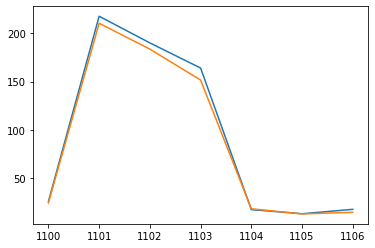

In [ ]:
plt.plot(range(1100,1107), pred_test[1100:])
plt.plot(range(1100,1107), y_test[1100:])

FACEBOOOOOOOK NN fbprophet

In [ ]:
!pip install fbprophet

In [ ]:
dat_target = yf.Ticker('NVDA')
target = dat_target.history(start="2015-01-01", end="2021-01-04")
target

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,19.374790,19.519164,19.066796,19.374790,2842000,0.0,0
2015-01-05,19.374791,19.432541,18.960925,19.047548,4948800,0.0,0
2015-01-06,19.076420,19.095670,18.450806,18.470057,4944100,0.0,0
2015-01-07,18.604805,18.768427,18.364184,18.421932,8045200,0.0,0
2015-01-08,18.633674,19.230413,18.624049,19.114916,7094500,0.0,0
...,...,...,...,...,...,...,...
2020-12-24,521.489990,525.299988,517.549988,519.750000,2447100,0.0,0
2020-12-28,522.500000,522.500000,510.529999,516.000000,5314100,0.0,0
2020-12-29,517.000000,522.900024,513.690002,517.729980,4259300,0.0,0


In [ ]:
y = pd.DataFrame(target.Open)
y

,Open
Date,
2015-01-02,19.374790
2015-01-05,19.374791
2015-01-06,19.076420
2015-01-07,18.604805
2015-01-08,18.633674
...,...
2020-12-24,521.489990
2020-12-28,522.500000
2020-12-29,517.000000


In [ ]:
#импортируем библиотеку
from fbprophet import Prophet

predictions = 30

y.Open = np.log(y.Open)
df = pd.DataFrame({'Date': y.reset_index().loc[5:].Date.values, 'Valeus': y.reset_index().loc[:1505].Open.values - y.reset_index().loc[5:].Open.values})
# приводим dataframe к нужному формату
#df = y.reset_index()
df.columns = ['ds', 'y']

# отрезаем из обучающей выборки последние 30 точек, чтобы измерить на них качество
train_df = df[:-predictions] 

In [ ]:
m = Prophet()
m.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1501,2020-12-13,0.000695,-0.073918,0.079191
1502,2020-12-14,-0.012367,-0.090910,0.062979
1503,2020-12-15,-0.014498,-0.089744,0.057092
1504,2020-12-16,-0.016213,-0.094335,0.063157
1505,2020-12-17,-0.016761,-0.092003,0.059425


In [ ]:
np.exp(forecast[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
1501,1.000696,0.928748,1.082411
1502,0.987709,0.913100,1.065005
1503,0.985607,0.914165,1.058753
1504,0.983918,0.909978,1.065194
1505,0.983379,0.912102,1.061226


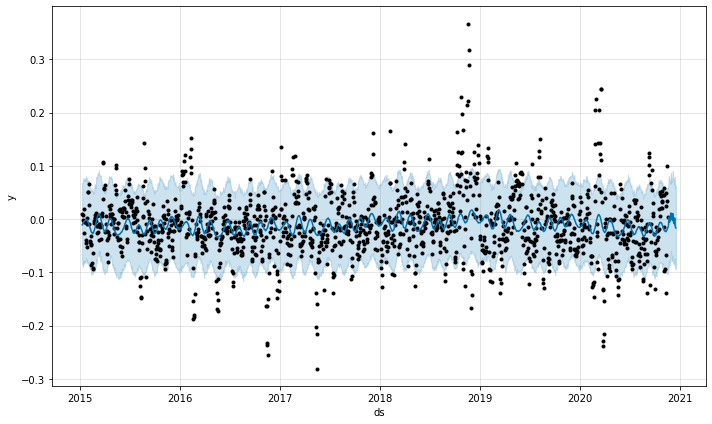

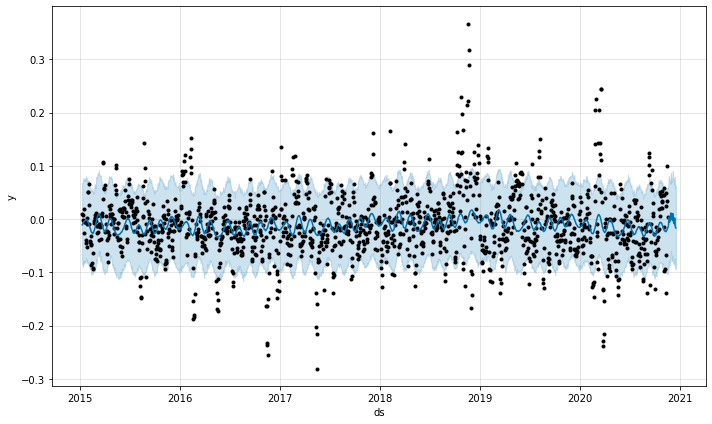

In [ ]:
m.plot(forecast)

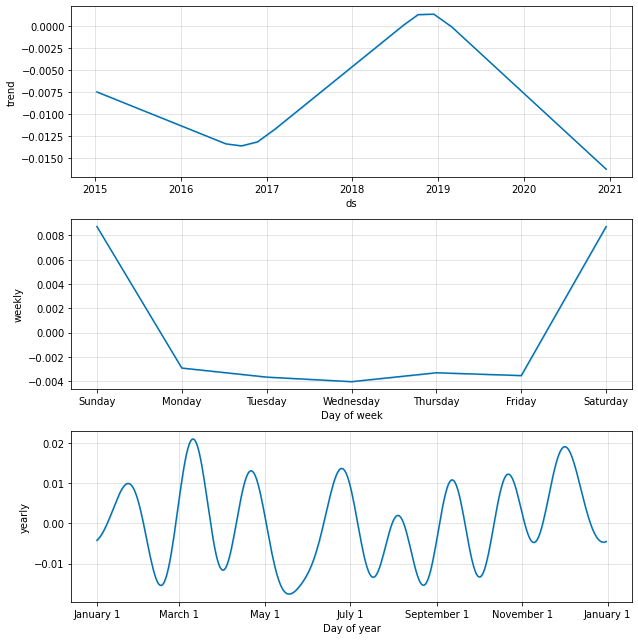

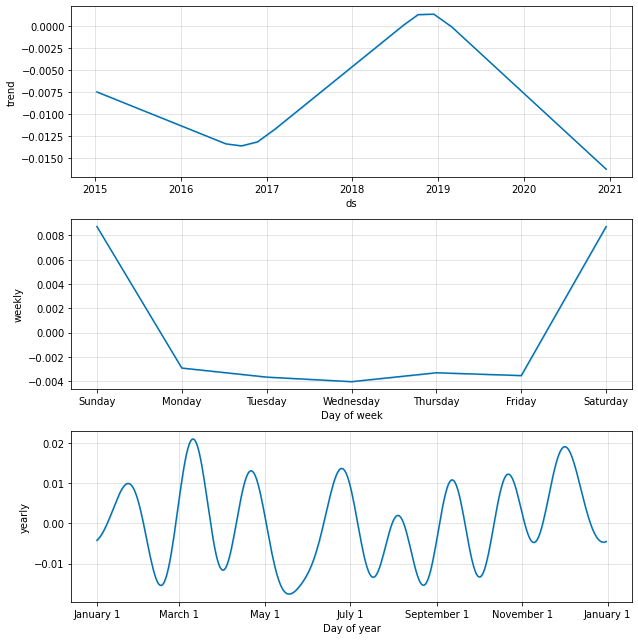

In [ ]:
m.plot_components(forecast)

In [ ]:
print(', '.join(forecast.columns))

ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, weekly, weekly_lower, weekly_upper, yearly, yearly_lower, yearly_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, yhat


In [ ]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))

In [ ]:
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print ('MAPE', np.mean(abs(cmp_df[-predictions:]['p'])))
print ('MAE', np.mean(abs(cmp_df[-predictions:]['e'])))

MAPE 434.83714259435675
MAE 0.024165314313905877


In [ ]:
! pip install chart_studio

     |████████████████████████████████| 71kB 5.6MB/s 


In [ ]:
import plotly.graph_objects as go
from plotly.offline import iplot

In [ ]:
def show_forecast(cmp_df, num_predictions, num_values):
    # верхняя граница доверительного интервала прогноза
    upper_bound = go.Scatter(
        name='Upper Bound',
        x=cmp_df.tail(num_predictions).index,
        y=cmp_df.tail(num_predictions).yhat_upper,
        mode='lines')

    # прогноз
    forecast = go.Scatter(
        name='Prediction',
        x=cmp_df.tail(predictions).index,
        y=cmp_df.tail(predictions).yhat,
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    )

    # нижняя граница доверительного интервала
    lower_bound = go.Scatter(
        name='Lower Bound',
        x=cmp_df.tail(num_predictions).index,
        y=cmp_df.tail(num_predictions).yhat_lower,
        mode='lines')

    # фактические значения
    fact = go.Scatter(
        name='Fact',
        x=cmp_df.tail(num_values).index,
        y=cmp_df.tail(num_values).y,
        marker=dict(color="red"),
        mode='lines',
    )

    # последовательность рядов в данном случае важна из-за применения заливки
    data = [lower_bound, upper_bound, forecast, fact]

    layout = go.Layout(
        yaxis=dict(title='Цена'),
        title='Nvidia',
        showlegend = False)

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)

show_forecast(cmp_df, predictions, 200)

In [ ]:
import itertools
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [ ]:
cutoffs = pd.to_datetime(['2018-02-15', '2018-08-15', '2019-02-15'])

In [ ]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train_df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    mses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f23cae30898>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f23cae30e48>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f23ca9a7898>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f23cae308d0>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in par

KeyboardInterrupt: ignored

In [ ]:
dat = yf.Tickers('NVDA NDAQ AAPL MSFT ADBE GOOGL AMZN CSCO EBAY INTC NFLX QCOM XLNX BIDU ATVI EA JPM JNJ XOM BAC WFC T PFE BA ORCL DIS IBM MCD ABT BKNG GS NKE SBUX MS BLK GD FDX SPGI SPG')

In [ ]:
data = dat.download(start="2010-01-01", end="2020-12-30")

[*********************100%***********************]  39 of 39 completed


In [ ]:
data

Close              ...     Volume            
                  AAPL         ABT  ...       XLNX         XOM
Date                                ...                       
2010-01-04    6.593426   20.155407  ...  2824700.0  27809100.0
2010-01-05    6.604825   19.992567  ...  3469700.0  30174700.0
2010-01-06    6.499768   20.103596  ...  6329200.0  35044700.0
2010-01-07    6.487752   20.270136  ...  9252700.0  27192100.0
2010-01-08    6.530883   20.373764  ...  5005800.0  24891800.0
...                ...         ...  ...        ...         ...
2020-12-22  131.880005  108.279999  ...  1899900.0  21792900.0
2020-12-23  130.960007  107.449997  ...  1766400.0  19085900.0
2020-12-24  131.970001  108.349998  ...  1167500.0   8039000.0
2020-12-28  136.690002  107.790001  ...  1978500.0  23877500.0
2020-12-29  134.869995  108.330002  ...  1489900.0  20287700.0

[2768 rows x 273 columns]

In [ ]:
data2 = data

In [ ]:
columns = data2.columns
columns = columns.drop('Dividends')
columns = columns.drop('Stock Splits')
columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close',  'ABT'),
            ( 'Close', 'ADBE'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'ATVI'),
            ( 'Close',   'BA'),
            ( 'Close',  'BAC'),
            ( 'Close', 'BIDU'),
            ( 'Close', 'BKNG'),
            ( 'Close',  'BLK'),
            ...
            ('Volume', 'ORCL'),
            ('Volume',  'PFE'),
            ('Volume', 'QCOM'),
            ('Volume', 'SBUX'),
            ('Volume',  'SPG'),
            ('Volume', 'SPGI'),
            ('Volume',    'T'),
            ('Volume',  'WFC'),
            ('Volume', 'XLNX'),
            ('Volume',  'XOM')],
           length=195)

In [ ]:
data2.Volume = data2.Volume/10000
data2[columns] = data2[columns]/1000
data2.head()

Close                     ...   Volume                  
                AAPL       ABT     ADBE  ...      WFC     XLNX      XOM
Date                                     ...                           
2010-01-04  0.006593  0.020155  0.03709  ...  3.93357  0.28247  2.78091
2010-01-05  0.006605  0.019993  0.03770  ...  5.54160  0.34697  3.01747
2010-01-06  0.006500  0.020104  0.03762  ...  3.32370  0.63292  3.50447
2010-01-07  0.006488  0.020270  0.03689  ...  6.16490  0.92527  2.71921
2010-01-08  0.006531  0.020374  0.03669  ...  3.55087  0.50058  2.48918

[5 rows x 273 columns]

In [ ]:
data2.drop(columns=['Stock Splits', 'Dividends'], inplace=True)

In [ ]:
data3 = data2.unstack().reset_index().drop(columns=['level_0', 'level_1'])
data3

,Date,0
0,2010-01-04,0.006593
1,2010-01-05,0.006605
2,2010-01-06,0.006500
3,2010-01-07,0.006488
4,2010-01-08,0.006531
...,...,...
539755,2020-12-22,2.179290
539756,2020-12-23,1.908590
539757,2020-12-24,0.803900
539758,2020-12-28,2.387750


In [ ]:
data3.columns = ['Date', 'Values']

In [ ]:
data4 = data3.groupby(['Date']).agg('sum')
data4

,Values
Date,
2010-01-04,135.513138
2010-01-05,156.281730
2010-01-06,144.662699
2010-01-07,151.781891
2010-01-08,129.801219
...,...
2020-12-22,109.540741
2020-12-23,98.464500
2020-12-24,74.864850


In [ ]:
#импортируем библиотеку
from fbprophet import Prophet

predictions = 30

# приводим dataframe к нужному формату
df = data4.reset_index()
df.columns = ['ds', 'y']

# отрезаем из обучающей выборки последние 30 точек, чтобы измерить на них качество
train_df = df[:-predictions] 

In [ ]:
m = Prophet()
m.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)

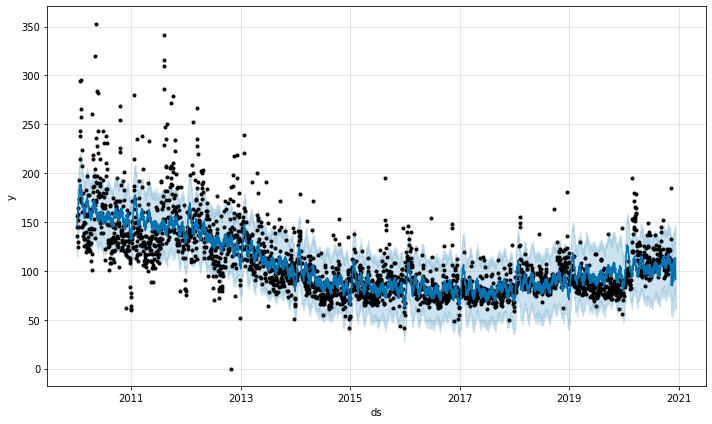

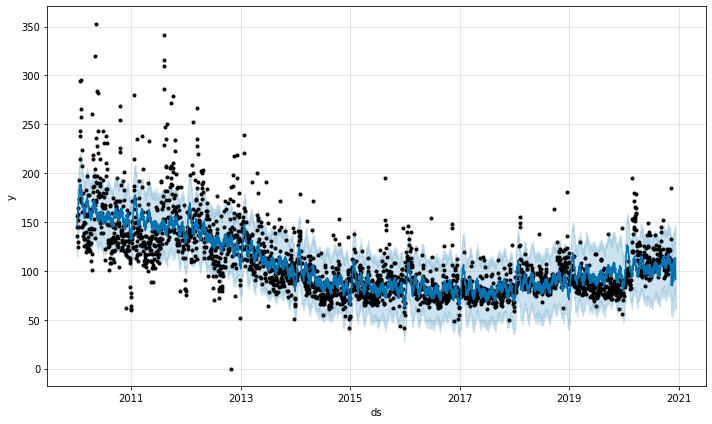

In [ ]:
m.plot(forecast)

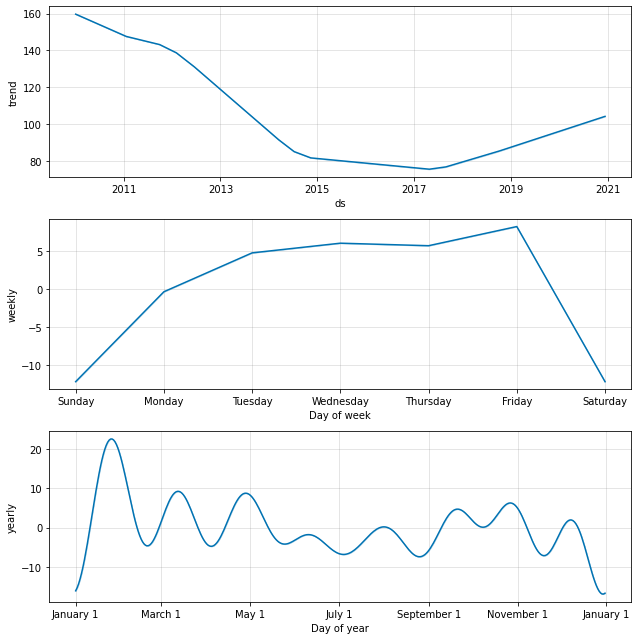

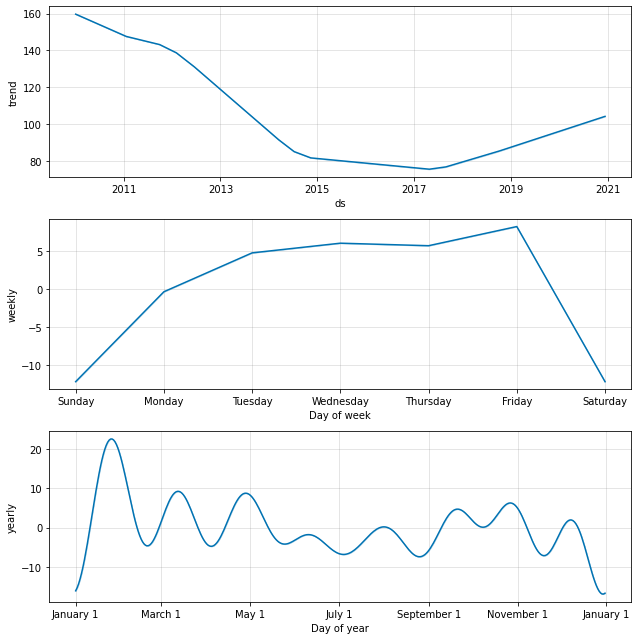

In [ ]:
m.plot_components(forecast)

In [ ]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']

print ('MAPE', np.mean(abs(cmp_df[-predictions:]['p'])))
print ('MAE', np.mean(abs(cmp_df[-predictions:]['e'])))

MAPE 8.277727861106655
MAE 8.944959428584376


In [ ]:
def show_forecast(cmp_df, num_predictions, num_values):
    # верхняя граница доверительного интервала прогноза
    upper_bound = go.Scatter(
        name='Upper Bound',
        x=cmp_df.tail(num_predictions).index,
        y=cmp_df.tail(num_predictions).yhat_upper,
        mode='lines')

    # прогноз
    forecast = go.Scatter(
        name='Prediction',
        x=cmp_df.tail(predictions).index,
        y=cmp_df.tail(predictions).yhat,
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    )

    # нижняя граница доверительного интервала
    lower_bound = go.Scatter(
        name='Lower Bound',
        x=cmp_df.tail(num_predictions).index,
        y=cmp_df.tail(num_predictions).yhat_lower,
        mode='lines')

    # фактические значения
    fact = go.Scatter(
        name='Fact',
        x=cmp_df.tail(num_values).index,
        y=cmp_df.tail(num_values).y,
        marker=dict(color="red"),
        mode='lines',
    )

    # последовательность рядов в данном случае важна из-за применения заливки
    data = [lower_bound, upper_bound, forecast, fact]

    layout = go.Layout(
        yaxis=dict(title='SUM'),
        title='ALL',
        showlegend = False)

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)

show_forecast(cmp_df, predictions, 200)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
#creating train and test sets
dataset = new_data.values
train = dataset[0:987,:]
valid = dataset[987:,:]
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)